<a href="https://colab.research.google.com/github/Eric428-a/-LMS-Learning-Management-System/blob/master/1_4_4_b_Stock_Price_Prediction_Starter_Kit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Setting Up Your Environment

In [13]:
# Install necessary libraries

In [14]:
# !pip install numpy pandas matplotlib scikit-learn seaborn

In [16]:
import pandas as pd  # Importing pandas library for data manipulation

In [17]:
import matplotlib.pyplot as plt  # Importing matplotlib library for plotting

In [18]:
import seaborn as sns  # Importing seaborn library for visualization

In [19]:
from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting data

In [20]:
from sklearn.linear_model import LinearRegression  # Importing LinearRegression model

In [21]:
from sklearn.metrics import mean_squared_error  # Importing mean_squared_error for model evaluation

In [22]:
from sklearn.impute import SimpleImputer  # Importing SimpleImputer for handling missing values

In [23]:
import numpy as np  # Importing numpy library for numerical computations


# Step 2: Data Collection

In [15]:
#Download the dataset from Kaggle: https://www.kaggle.com/rohanrao/nifty50-stock-market-data

# Step 3: Data Loading and Preprocessing

In [24]:
# Load the dataset

In [25]:
data = pd.read_csv('/content/NIFTY50_all.csv')  # Load the dataset from CSV file

In [26]:
# Preprocessing the Data

In [28]:
# Handle missing values, convert data types if necessary, and possibly create new time-based features such as moving averages.


In [29]:
# Check for missing values

In [30]:
print(data.isnull().sum())  # Print the number of missing values for each column

Date                       0
Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                114848
Deliverable Volume     16077
%Deliverble            16077
dtype: int64


In [31]:
# Fill missing values if any, for simplicity we'll fill with the previous value

In [32]:
data.fillna(method='ffill', inplace=True)  # Fill missing values using the previous value


In [33]:
# Convert the 'Date' column to datetime type

In [34]:
data['Date'] = pd.to_datetime(data['Date'])  # Convert 'Date' column to datetime


# Step 4: Exploratory Data Analysis (EDA)

In [35]:
# General Overview

In [36]:
# Plotting the closing prices

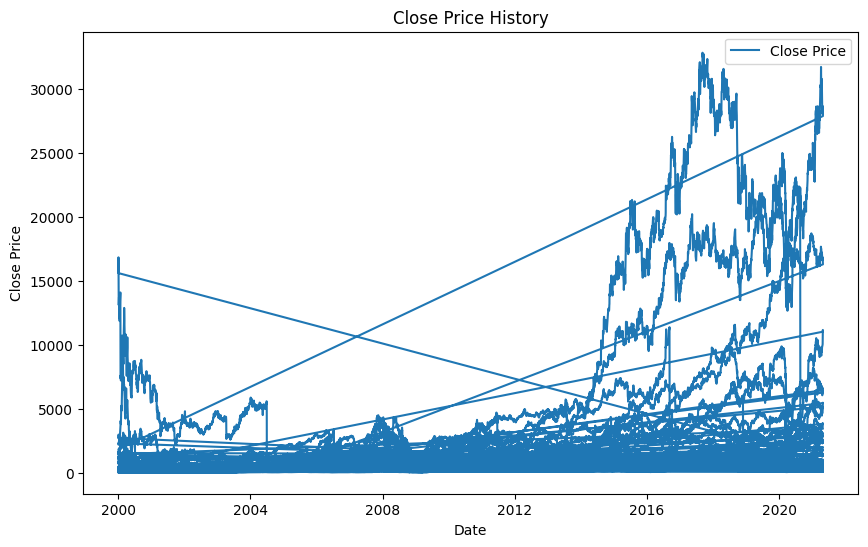

In [37]:
plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(data['Date'], data['Close'], label='Close Price')  # Plot closing prices over time
plt.title('Close Price History')  # Set title
plt.xlabel('Date')  # Set x-axis label
plt.ylabel('Close Price')  # Set y-axis label
plt.legend()  # Add legend
plt.show()  # Display the plot

In [38]:
# Correlation Analysis

In [39]:
# Correlation matrix

In [42]:
# Drop non-numeric columns that are not needed for correlation analysis

In [43]:
data_numeric = data.select_dtypes(include=np.number)  # Select only numeric columns from the dataset for correlation analysis


In [44]:
# Calculate correlation matrix

In [45]:
corr_matrix = data_numeric.corr()  # Calculate the correlation matrix of the numeric columns

In [46]:
# Plot correlation matrix heatmap

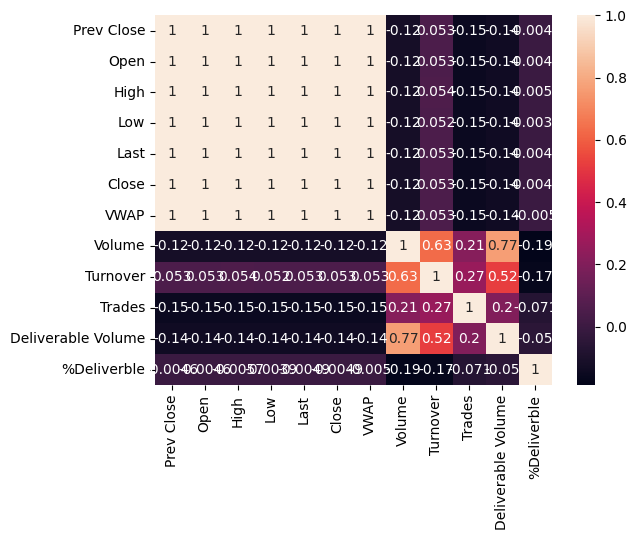

In [47]:
sns.heatmap(corr_matrix, annot=True)  # Plot the heatmap of the correlation matrix with annotations
plt.show()  # Display the plot


# Step 5: Feature Engineering

In [48]:
# Adding moving averages

In [49]:
data['MA10'] = data['Close'].rolling(window=10).mean()  # Calculate 10-day moving average

In [50]:
data['MA50'] = data['Close'].rolling(window=50).mean()  # Calculate 50-day moving average

In [51]:
# Adding day of the week

In [52]:
data['Day_of_week'] = data['Date'].dt.dayofweek  # Extract day of the week from 'Date'

# Step 6: Preparing Data for Training

In [53]:
# Features and target

In [54]:
X = data[['Open', 'High', 'Low', 'MA10', 'MA50', 'Day_of_week']]  # Features

In [55]:
y = data['Close']  # Target

In [56]:
# Splitting the dataset into training and testing sets

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split data into train and test sets


In [58]:
# Impute missing values with mean

In [59]:
imputer = SimpleImputer(strategy='mean')  # Initialize imputer

In [60]:
X_train_imputed = imputer.fit_transform(X_train)  # Impute missing values in training set

In [61]:
X_test_imputed = imputer.transform(X_test)  # Impute missing values in test set

# Step 7: Model Building and Training

In [64]:
# Model Building and Training

In [62]:
model = LinearRegression()  # Initialize Linear Regression model

In [63]:
model.fit(X_train_imputed, y_train)  # Train the model using the imputed training data

LinearRegression()

# Step 8: Model Evaluation

In [65]:
# Model Evaluation

In [66]:
y_pred = model.predict(X_test_imputed)  # Predictions on test data

In [67]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calculate Root Mean Squared Error (RMSE)

In [68]:
print(f'Root Mean Squared Error: {rmse}')  # Print RMSE

Root Mean Squared Error: 22.11539272672942



# Step 9: Visualization of Predictions

In [69]:
# Visualization of Predictions

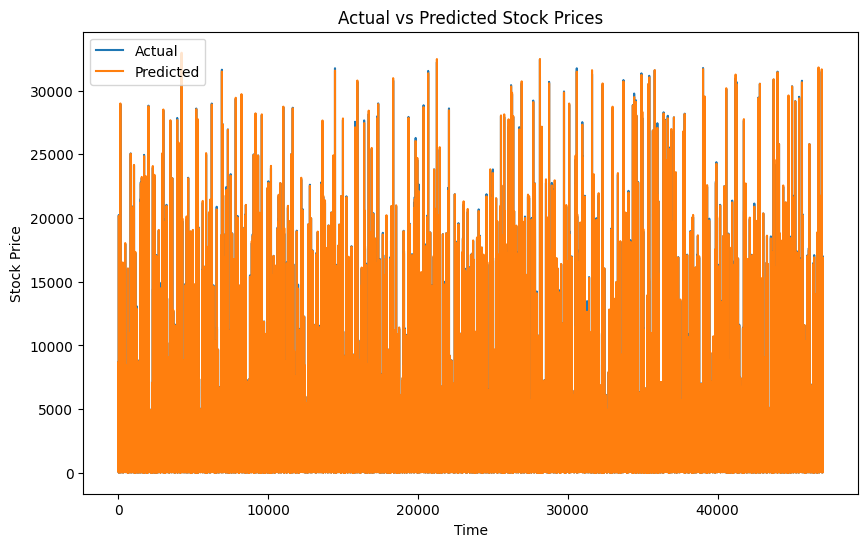

In [70]:
plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(y_test.reset_index(drop=True), label='Actual')  # Plot actual stock prices
plt.plot(pd.Series(y_pred, index=y_test.index).reset_index(drop=True), label='Predicted')  # Plot predicted stock prices
plt.title('Actual vs Predicted Stock Prices')  # Set title
plt.xlabel('Time')  # Set x-axis label
plt.ylabel('Stock Price')  # Set y-axis label
plt.legend()  # Add legend
plt.show()  # Display the plot